In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
%matplotlib inline

In [91]:
data = pd.read_csv('C:\\Users\\Abdullah\\OneDrive\\Documents\\Cellula Internship\\Third task\\first inten project.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


# **Preprocessing**

In [92]:
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

categorical_cols = ["type_of_meal", "room_type", "market_segment_type", "booking_status"]
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.strip())

data["date_of_reservation"] = pd.to_datetime(data["date_of_reservation"], errors="coerce")

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   booking_id                36285 non-null  object        
 1   number_of_adults          36285 non-null  int64         
 2   number_of_children        36285 non-null  int64         
 3   number_of_weekend_nights  36285 non-null  int64         
 4   number_of_week_nights     36285 non-null  int64         
 5   type_of_meal              36285 non-null  object        
 6   car_parking_space         36285 non-null  int64         
 7   room_type                 36285 non-null  object        
 8   lead_time                 36285 non-null  int64         
 9   market_segment_type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  p-c                       36285 non-null  int64         
 12  p-not-c           

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


In [93]:
missing_values = data.isnull().sum()

data_types = data.dtypes

data_trimmed = data.copy()
for col in data_trimmed.select_dtypes(include=["object"]).columns:
    data_trimmed[col] = data_trimmed[col].str.strip()

changes_made = (data != data_trimmed).sum().sum()

print(missing_values)
print(data_types)
print(changes_made)


booking_id                   0
number_of_adults             0
number_of_children           0
number_of_weekend_nights     0
number_of_week_nights        0
type_of_meal                 0
car_parking_space            0
room_type                    0
lead_time                    0
market_segment_type          0
repeated                     0
p-c                          0
p-not-c                      0
average_price                0
special_requests             0
date_of_reservation         37
booking_status               0
dtype: int64
booking_id                          object
number_of_adults                     int64
number_of_children                   int64
number_of_weekend_nights             int64
number_of_week_nights                int64
type_of_meal                        object
car_parking_space                    int64
room_type                           object
lead_time                            int64
market_segment_type                 object
repeated                      

In [94]:
data.dropna(subset=['date_of_reservation'], inplace=True) #37 is a very low number of records in comparison with the total number

In [95]:
data.isnull().sum()

booking_id                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
p-c                         0
p-not-c                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [96]:
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols.remove("p-c")
numerical_cols.remove("p-not-c")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


outliers = {col: detect_outliers_iqr(data, col).shape[0] for col in numerical_cols}
print(outliers)

{'number_of_adults': 10155, 'number_of_children': 2698, 'number_of_weekend_nights': 21, 'number_of_week_nights': 323, 'car_parking_space': 1121, 'lead_time': 1332, 'repeated': 926, 'average_price': 1692, 'special_requests': 762}


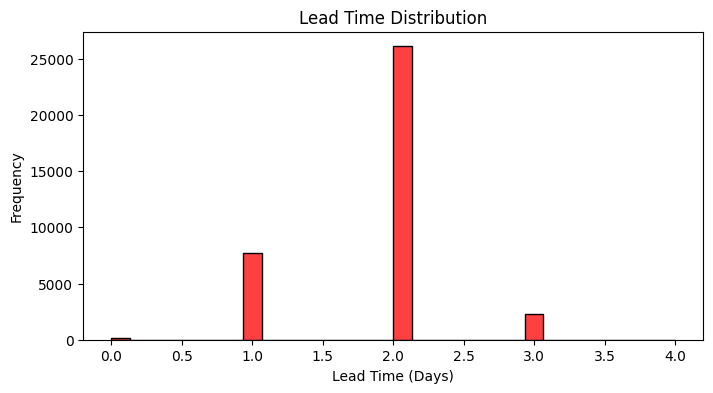

In [97]:
plt.figure(figsize=(8,4))
sns.histplot(data["number_of_adults"], bins=30, kde=False, color="red")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

In [98]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

def Z_scores_handle(data, column):
    mean = data[column].mean()
    std = data[column].std()
    threshold = 3.0
    data[column] = np.where(np.abs((data[column] - mean) / std) > threshold, mean, data[column])
    return data


for col in ["lead_time", "average_price"]:
    cap_outliers_iqr(data, col)

for col in ["number_of_children", "number_of_adults"]:
    Z_scores_handle(data, col)


outliers_after_capping = {col: detect_outliers_iqr(data, col).shape[0] for col in numerical_cols}

In [99]:
data.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1.0,1.0,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1.0,0.0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2.0,1.0,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1.0,0.0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0,2018-04-11,Canceled


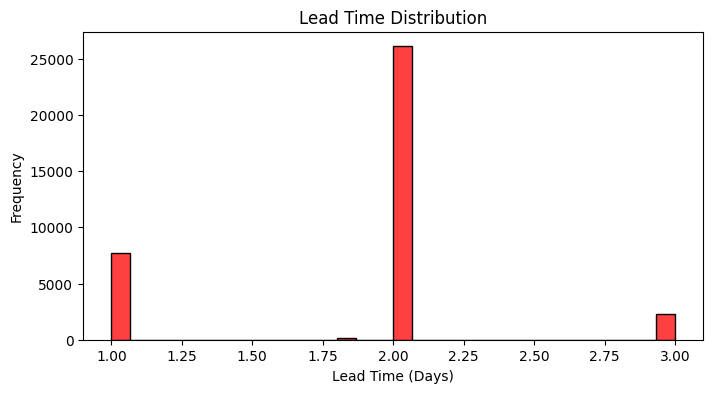

In [100]:
plt.figure(figsize=(8,4))
sns.histplot(data["number_of_adults"], bins=30, kde=False, color="red")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

In [101]:
def robust_scale(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    median = data[column].median()
    data[column] = (data[column] - median) / IQR
    return data

for col in ['lead_time', 'average_price']:
    data = robust_scale(data, col)


In [102]:
data = data.drop(columns=["booking_id", "date_of_reservation"])

data["booking_status"] = data["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

categorical_cols = ["type_of_meal", "room_type", "market_segment_type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

with open("label_encoders.pkl", "wb") as encoder_file:
    pickle.dump(label_encoders, encoder_file)

data.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,booking_status
0,1.0,1.0,2,5,0,0,0,1.532110,3,0,0,0,-0.288413,0,0
1,1.0,0.0,1,3,3,0,0,-0.477064,4,0,0,0,0.182116,1,0
2,2.0,1.0,1,3,0,0,0,-0.513761,4,0,0,0,-1.245592,0,1
3,1.0,0.0,0,2,0,0,0,1.412844,4,0,0,0,0.013854,1,1
4,1.0,0.0,1,2,3,0,0,-0.082569,4,0,0,0,-0.565491,0,1


# **VIF columns dropping**

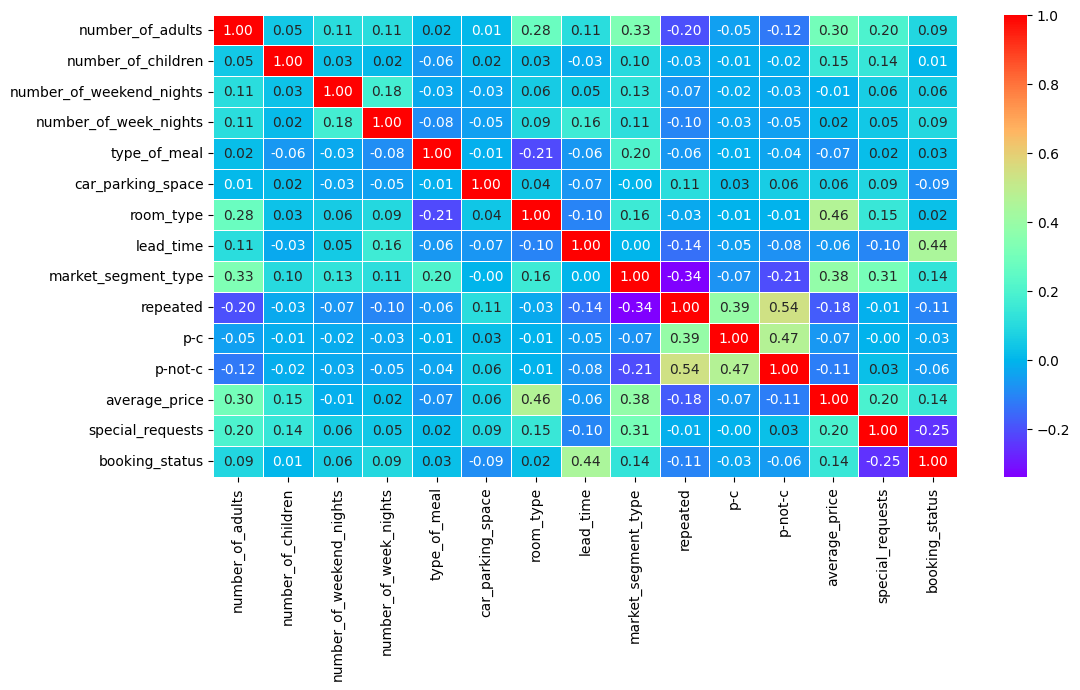

In [103]:
plt.figure(figsize=(12,6))

sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="rainbow", fmt=".2f", linewidths=0.5)
plt.show()

In [104]:
X_numeric = data.select_dtypes(include=["int64", "float64"])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
8,market_segment_type,17.974434
0,number_of_adults,15.372806
3,number_of_week_nights,3.704183
14,booking_status,2.169864
13,special_requests,2.052056
2,number_of_weekend_nights,1.983511
6,room_type,1.777015
11,p-not-c,1.605200
9,repeated,1.558903
7,lead_time,1.515328


# **Model**

In [105]:
X = data.drop(columns=["booking_status", "number_of_adults", "market_segment_type"]) #remove number of adults & market segment type columns as they have very high VIF
y = data["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28998, 12), (7250, 12), (28998,), (7250,))

0.7851034482758621


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4873
           1       0.73      0.55      0.63      2377

    accuracy                           0.79      7250
   macro avg       0.77      0.72      0.74      7250
weighted avg       0.78      0.79      0.78      7250





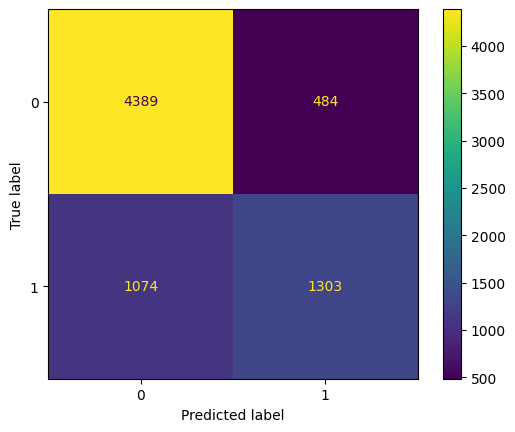

In [106]:
from sklearn import metrics

model = LogisticRegression(max_iter = 5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


print(accuracy)
print("\n")
print(report)
print("\n")

plt.show()

# **Deployment**

In [107]:
from flask import Flask


pickle.dump(model, open('model.pkl', 'wb'))

In [108]:


# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully as model.pkl")


Model saved successfully as model.pkl


In [110]:
from flask import Flask, render_template, request
from sklearn.preprocessing import PolynomialFeatures



def cap_outliers_iqr2(value, data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    value = np.clip(value, lower_bound, upper_bound)
    return value


def robust_scale2(value, data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    median = data[column].median()
    value = (value - median) / IQR
    return value



app = Flask(__name__)




# Mapping categorical inputs
meal_mapping = {"Not Selected": 0, "Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3}
room_mapping = {f"Room Type {i}": i - 1 for i in range(1, 8)}
market_mapping = {"Online": 0, "Offline": 1, "Corporate": 2, "Affiliation": 3, "Complementary": 4}

@app.route("/", methods=["GET", "POST"])
def home():
    if request.method == "POST":
        try:
            # Collect input from form
            user_input = {
                "children": int(request.form["children"]),
                "weekend_nights": int(request.form["weekend_nights"]),
                "week_nights": int(request.form["week_nights"]),
                "meal_type": meal_mapping[request.form["meal_type"]],
                "parking": int(request.form["parking"]),
                "room_type": room_mapping[request.form["room_type"]],
                "lead_time": int(request.form["lead_time"]),
                "repeated": int(request.form["repeated"]),
                "p_c": float(request.form["p_c"]),
                "p_not_c": float(request.form["p_not_c"]),
                "average_price": float(request.form["price"]),
                "special_requests": int(request.form["special_requests"])
            }

            user_input["children"] = np.abs((user_input["children"] - data['number_of_children'].mean()) / data['number_of_children'].std())
            for col in ["lead_time", "average_price"]:
                user_input[col] = cap_outliers_iqr2(user_input[col], data, col)
            for col in ["lead_time", "average_price"]:
                user_input[col] = robust_scale2(user_input[col], data, col)

            # Convert user input to numpy array for prediction
            input_array = np.array(list(user_input.values())).reshape(1, -1)

            

            pred = int(model.predict(input_array)[0])

            results = {

                "Cancellation Prediction": "Likely to Cancel" if pred == 1 else "Not Likely to Cancel"
            }
            # Return results with input
            return render_template("index.html", result=results)

        except Exception as e:
            return render_template("index.html", error=str(e))

    return render_template("index.html", result=None)

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Feb/2025 14:46:42] "GET / HTTP/1.1" 200 -
c:\Users\Abdullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Feb/2025 14:46:47] "POST / HTTP/1.1" 200 -
